### import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time
from matplotlib import cm as cm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ne

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### load data

In [2]:
def loadData(file):
    data = pd.read_csv('data/'+file, sep="\t", header=None)
    return data

In [7]:
#load data
xtrain = loadData('xtrain.txt').T
xtest = loadData('xtest.txt').T
ytrain = loadData('ytrain.txt')

# #take first row as columns names
header1 = xtrain.iloc[0]
xtrain = xtrain[1:]
xtrain = xtrain.rename(columns = header1)

header2 = xtest.iloc[0]
xtest = xtest[1:]
xtest = xtest.rename(columns = header2)


In [8]:
xtrain.shape, ytrain.shape

((184, 4654), (184, 1))

In [9]:
negatif = 0
positif = 0
for i in range(len(ytrain)):
    if ytrain[0][i] == -1:
        negatif += 1
    else:
        positif += 1
print(negatif, positif)

118 66


In [10]:
xtrain.head()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.44,7.84,9.23,2.2,4.93,10.31,7.85,9.91,11.37,3.48,...,7.71,11.32,6.37,8.63,8.61,7.42,8.79,4.7,7.23,8.28
2,7.93,8.47,7.77,2.48,6.7,11.03,3.33,9.53,10.91,4.28,...,9.98,10.4,5.96,7.61,9.51,8.2,9.27,4.7,6.7,12.78
3,7.53,7.49,9.49,5.66,5.99,8.87,3.48,8.02,10.73,4.07,...,8.34,10.57,6.92,8.2,8.71,8.56,8.9,4.7,7.7,12.22
4,7.72,8.38,8.03,5.22,6.95,2.73,4.06,9.26,10.9,7.4,...,9.05,10.92,5.73,8.44,9.18,7.86,9.3,5.58,7.95,12.18
5,7.89,7.75,6.99,2.2,7.06,11.38,3.65,9.22,10.37,3.89,...,9.16,10.73,7.45,7.79,9.15,7.97,8.5,4.7,6.63,12.12


In [11]:
xtest.head()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.54,7.76,8.08,2.2,7.23,10.07,4.16,9.77,10.7,5.35,...,9.44,11.18,6.65,7.92,9.32,8.48,8.51,4.01,7.91,9.46
2,8.13,8.18,7.68,2.2,7.11,8.91,5.05,8.8,10.64,4.86,...,8.51,11.31,5.76,7.43,10.39,8.23,9.49,4.7,7.14,7.02
3,7.94,8.26,7.37,2.2,6.98,11.81,4.16,10.07,10.64,4.3,...,8.4,10.2,5.35,8.42,9.44,7.87,8.64,4.78,6.13,10.57
4,8.7,8.08,8.27,2.2,7.45,7.9,5,8.66,10.41,5.07,...,8.9,10.77,6.6,7.8,9.39,8.74,9.61,5.13,6.73,5.31
5,8.97,8.2,8.87,2.2,6.98,11.49,3.47,9.97,11.63,4.65,...,9.15,11.9,7.34,8.26,8.81,8.12,9.93,7.07,6.84,3


In [12]:
np.all(xtrain.columns == xtest.columns)

True

In [258]:
xtrain.describe()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
count,184.00,184.00,184.00,184.0,184.00,184.00,184.00,184.00,184.00,184.00,...,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.0,184.00,184.0
unique,121.00,111.00,137.00,61.0,128.00,148.00,117.00,126.00,110.00,125.00,...,148.00,121.00,136.00,127.00,114.00,125.00,129.00,74.0,137.00,144.0
top,7.79,8.21,8.23,2.2,6.97,11.03,3.68,9.22,10.74,4.28,...,9.72,11.34,5.76,7.87,9.78,8.18,8.86,4.7,7.38,3.0
freq,13.00,6.00,5.00,105.0,9.00,5.00,5.00,4.00,4.00,14.00,...,3.00,4.00,19.00,5.00,4.00,4.00,4.00,49.0,10.00,29.0


### Features Selection

In [343]:
np.random.seed(41)
names = xtrain.columns.values
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)
importances = []
nameslist = []
for name, importance in zip(names, rf.feature_importances_):
    if importance != 0.0:
        #print(name, "=", importance) 
        importances.append(importance)
        nameslist.append(name)
#features = iris['feature_names']
# importances = rf.feature_importances_
# indices = np.argsort(importances)


In [344]:
x_train = xtrain[nameslist]

In [345]:
featuresImportances = pd.DataFrame(importances, index=nameslist, 
                              columns=["Importance"])
featuresImportances = featuresImportances.sort_values(by=['Importance'], ascending=False)
featuresImportances

,Importance
x11235_at,0.037243
x8668_at,0.031183
x9551_at,0.030643
x339448_at,0.029548
x3655_at,0.028803
x3632_at,0.027536
x10928_at,0.027092
x10248_at,0.024752
x5358_at,0.024731
x22882_at,0.023715


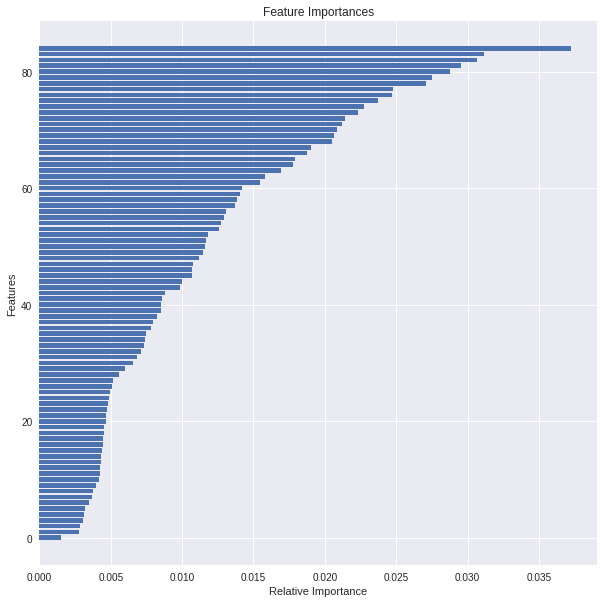

In [346]:
nameslist = np.array(nameslist)
importances.sort()
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances, align='center')
#plt.yticks(range(len(nameslist)), [nameslist[i] for i in range(len(nameslist))])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

### split data

In [13]:
Xtrain,Xtest, Ytrain, Ytest = train_test_split(xtrain, ytrain,test_size=0.34 )
Xtrain,Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain,test_size=0.17 )

In [14]:
Xtrain.shape, Xval.shape, Xtest.shape, xtest.shape

((100, 4654), (21, 4654), (63, 4654), (92, 4654))

### Plot Area Under Curve

In [15]:
from sklearn import metrics 
def plot_roc(model, parameters, y_true):
    """
    Arguments:
    model - trained model .
    parameters - array-like or sparse matrix of shape  [n_samples, n_features]. The input samples. 
    y_true - True binary labels in range {0, 1} or {-1, 1}. If labels are not binary, pos_label should be explicitly given.
    """
    if model is None:
        return 0., 0., np.array([])
    
    predicted = model.predict_proba(parameters)[:,1]
    threshold = 0.5
    predicted_binary = (predicted > threshold).astype(int)
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, predicted, pos_label=1)

    roc_auc = metrics.auc(fpr, tpr) 
    ks = np.max(tpr - fpr) # Kolmogorov-Smirnov test

#     print('ROC_auc = ', roc_auc)
#     print('KS_test = ', ks)
    print('AUC score: %f ' % metrics.roc_auc_score(y_true, predicted)) 

    try:
        plt.title('%s ROC curve ' % model.__class__.__name__)
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1], [0,1], 'r--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')

        # plt.savefig('ROC_curve.png')
        plt.show()
    except: pass
    return threshold

### Logistic Regression

In [17]:
Xtrain, Ytrain = np.array(Xtrain), np.array(Ytrain)[:,0]

In [23]:
# Grid search cross validation
np.random.seed(41)
grid={"C":np.linspace(10e-3,10,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(Xtrain,Ytrain)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l1'}
accuracy : 0.65


In [24]:
logreg2=LogisticRegression(C= 0.01,penalty="l1")
logreg2.fit(Xtrain,Ytrain)
print("score",logreg2.score(Xval,Yval))

score 0.47619047619047616


In [25]:
print("score",logreg2.score(Xtest,Ytest))

score 0.6825396825396826


AUC score: 0.454651 


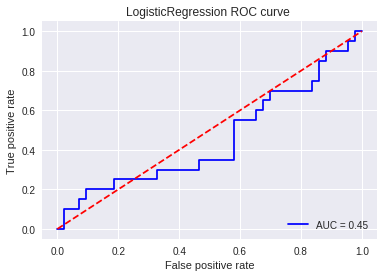

In [26]:
threshold = plot_roc(logreg2, Xtest, Ytest)

### Logistic regression CV

In [27]:
logregcv = LogisticRegressionCV(Cs=10)
logregcv.fit(Xtrain, Ytrain)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [28]:
print("score",logreg2.score(Xtest,Ytest))

score 0.6825396825396826


AUC score: 0.454651 


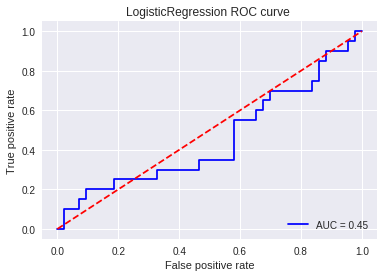

In [29]:
threshold = plot_roc(logreg2, Xtest, Ytest)

### SVM

In [30]:
def svc_param_selection(X, y, nfolds):
    np.random.seed(41)
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}
    grid_search = GridSearchCV(SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [31]:
svc_param_selection(Xtrain, Ytrain, 10)

{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}

In [32]:
svcmodel = SVC(C = 0.001, gamma=0.001, kernel='rbf', probability=True)
svcmodel.fit(Xtrain, Ytrain)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Validation score 0.47619047619047616
--------------------------------------------
test score 0.6825396825396826
--------------------------------------------
AUC score: 0.539535 


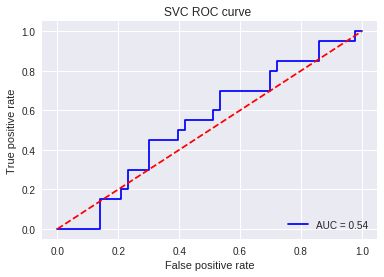

In [33]:
print("Validation score",svcmodel.score(Xval,Yval))
print("--------------------------------------------")
print("test score",svcmodel.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(svcmodel, Xtest, Ytest)

In [34]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = svcmodel.predict(Xtest)
cm = metrics.confusion_matrix(Ytest, y_pred)
#print(cm)

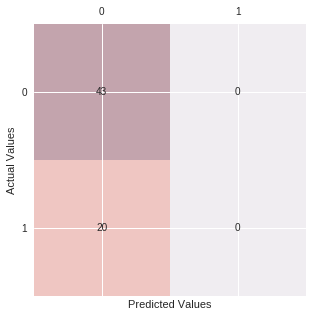

             precision    recall  f1-score   support

         -1       0.68      1.00      0.81        43
          1       0.00      0.00      0.00        20

avg / total       0.47      0.68      0.55        63



/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(Ytest, y_pred ))

### KNN

In [36]:
def KNN_param_selection(X, y):
    np.random.seed(41)
    k_range = list(range(1, 20))
    
    weight_options = ['uniform', 'distance']
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    knn = KNeighborsClassifier()
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10)
    # fit the grid with data
    grid.fit(X, y)
    return grid.best_params_

In [37]:
KNN_param_selection(Xtrain, Ytrain)

NameError: name 'KNeighborsClassifier' is not defined

In [399]:
knnmodel = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knnmodel.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Validation score 0.5238095238095238
--------------------------------------------
test score 0.5238095238095238
--------------------------------------------
AUC score: 0.521805 


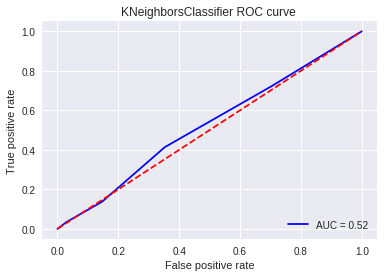

In [400]:
print("Validation score",knnmodel.score(Xval,Yval))
print("--------------------------------------------")
print("test score",knnmodel.score(Xtest,Ytest))
print("--------------------------------------------")
threshold = plot_roc(knnmodel, Xtest, Ytest)

### Gradient Boosting Classifier

In [401]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

0.5555555555555556

AUC score: 0.535497 


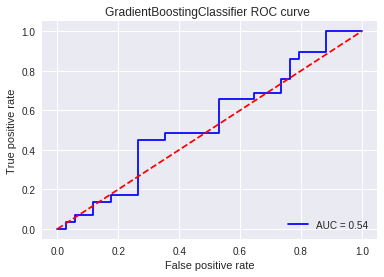

In [402]:
threshold = plot_roc(clf, Xtest, Ytest)

### Voting

In [403]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Logreg', logreg2),('Logreg', logregcv), ('SVM', svcmodel), ('KNN', knnmodel), ('clf', clf)], 
                       voting='soft', weights=[2,2,2,2,2]).fit(Xtrain,Ytrain)

In [404]:
print('The accuracy is:',ensemble.score(Xtest,Ytest))

The accuracy is: 0.5714285714285714


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


AUC score: 0.599391 


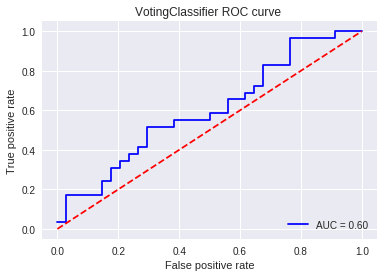

In [405]:
threshold = plot_roc(ensemble, Xtest, Ytest)

In [406]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred1 = ensemble.predict(Xtest)
cm1 = metrics.confusion_matrix(Ytest, y_pred1)
#print(cm)

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


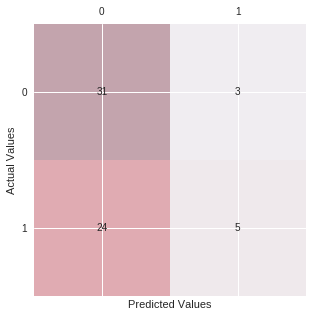

             precision    recall  f1-score   support

         -1       0.56      0.91      0.70        34
          1       0.62      0.17      0.27        29

avg / total       0.59      0.57      0.50        63



In [407]:
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm1, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm1.shape[0]):
     for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,
                s=cm1[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(Ytest, y_pred1 ))

### Prediction on xtest

In [414]:
for i in range(len(xtest)):
    print('sample'+str(i+1),'--------------------------------->', ensemble.predict_proba(xtest)[i][1])

sample1 ---------------------------------> 0.07612661232187747
sample2 ---------------------------------> 0.049773182970912815
sample3 ---------------------------------> 0.022861326226799268
sample4 ---------------------------------> 0.05039260516630238
sample5 ---------------------------------> 0.7456770299173849
sample6 ---------------------------------> 0.5367574605822956
sample7 ---------------------------------> 0.09270975471539789
sample8 ---------------------------------> 0.149970226870061
sample9 ---------------------------------> 0.23996819615385806
sample10 ---------------------------------> 0.05498108548610522
sample11 ---------------------------------> 0.46091656409911697
sample12 ---------------------------------> 0.1124510431359061
sample13 ---------------------------------> 0.023266224923275368
sample14 ---------------------------------> 0.01998992781931714
sample15 ---------------------------------> 0.810162179987185
sample16 ---------------------------------> 0.0424870